<a href="https://colab.research.google.com/github/HariPasapuleti/OIBSIP/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
car_dataset = pd.read_csv('/content/archive.zip')
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [4]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Selling_type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [5]:
car_dataset.replace({'Fuel_Type' : {'Petrol' : 0, 'Diesel' : 1, 'CNG' : 2}}, inplace = True)
car_dataset.replace({'Selling_type' : {'Dealer' : 0, 'Individual' : 1}}, inplace = True)
car_dataset.replace({'Transmission' : {'Manual' : 0, 'Automatic' : 1}}, inplace = True)

In [6]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
#car_dataset.replace({'Fuel_Type' : {'Petrol' : 0, 'Diesel' : 1, 'CNG' : 2}, 'Selling_type' : {'Dealer' : 0, 'Individual' : 1}, 'Transmission' : {'Manual' : 0, 'Automatic' : 1}})

In [7]:
x = car_dataset.drop(['Car_Name', 'Selling_Price'], axis = 1)
y = car_dataset['Selling_Price']
x

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [8]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [11]:
train_data_prediction = lr.predict(x_train)

In [12]:
error_score = metrics.r2_score(y_train, train_data_prediction)
print('R squared error :', error_score)

R squared error : 0.893292775865513


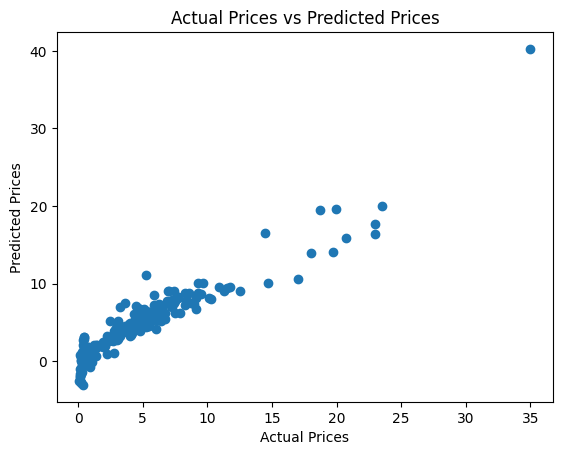

In [13]:
plt.scatter(y_train, train_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [14]:
test_data_prediction = lr.predict(x_test)
target = pd.DataFrame({'Actual' : y_test, 'Predicted' : test_data_prediction})
target

,Actual,Predicted
139,0.60,1.100669
188,0.25,0.220899
101,1.70,2.236901
10,2.85,4.364921
250,12.90,9.479231
...,...,...
53,16.00,15.277602
87,5.90,6.621246
265,6.50,6.429236
148,0.52,-0.797797


In [15]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print('R squared error : ', error_score)

R squared error :  0.828694107459963


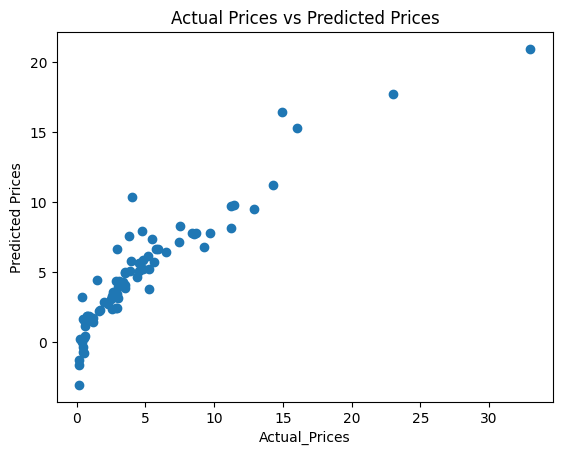

In [16]:
import matplotlib.pyplot as plt
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual_Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

Linear Regression sample prediction

In [27]:
y_pred = lr.predict(x_test)
print(y_pred)

[ 1.10066857e+00  2.20899177e-01  2.23690060e+00  4.36492101e+00
  9.47923145e+00  5.17726937e+00 -1.64859131e+00  7.75185355e+00
  1.64180361e+01  2.09266668e+01  5.22327860e+00  5.04317717e+00
  9.79824891e+00  6.63051269e+00  3.77795945e+00  2.43738254e+00
  1.86485044e+00  2.36199161e+00  8.11750502e+00  4.30684237e+00
  7.69412764e+00  5.66241062e+00  4.31855934e+00  1.71804698e+00
  2.44632867e+00  4.02970398e+00  5.76967876e+00  4.32601208e-01
  5.70916471e+00  3.93179206e+00  5.03508859e+00  1.64206044e+00
  4.88595764e+00  8.28136778e+00  6.15949316e+00  3.11726513e+00
  4.65112547e+00  3.54838120e+00  3.86841638e+00  1.12176495e+01
  1.84992887e-02  2.96340461e-01  7.93769432e+00  7.31303265e+00
  1.03562867e+01  4.38701495e+00  2.73446188e+00  4.28214407e+00
  1.77318532e+01 -3.57787475e-01  3.07266862e+00  5.86908520e+00
  3.28507350e+00  9.72329345e+00 -1.26624531e+00  7.56464437e+00
 -3.06880289e+00  7.13820848e+00  1.81321920e+00 -7.26677756e-01
  3.19274727e+00  6.59590

# Using Lasso Regression

In [28]:
from sklearn.linear_model import Lasso
las_regression = Lasso()
las_regression.fit(x_train, y_train)

Lasso()

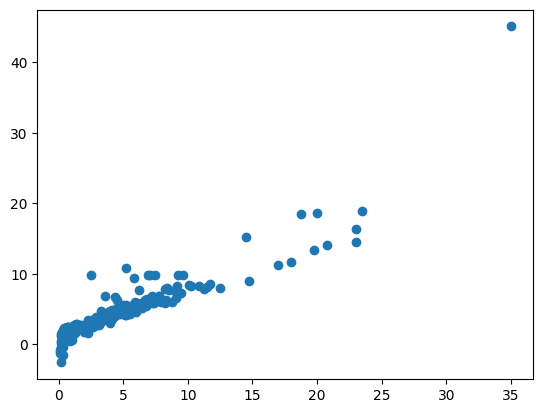

In [29]:
train_data_prediction = las_regression.predict(x_train)
plt.scatter(y_train, train_data_prediction)
plt.show()

Lasso sample prediction

In [31]:
y_predd = las_regression.predict(x_test)
print(y_predd)

[ 1.90086025  1.12199439  2.98314247  3.85278253  8.30969853  4.80052399
 -0.44699062  8.06755814 15.16561951 19.83848736  4.85466237  4.89107249
  8.70560222  4.9880288   4.5834711   2.35023449  2.5468496   2.25072194
  8.37033925  3.9079879   7.99657975  4.10858161  3.92239482  2.49977473
  2.35028389  4.95661059  4.20860038  1.36696735  5.54780884  4.33899768
  3.47797575  2.28337622  4.28029301  7.05421682  4.91729389  3.01018516
  4.55923714  3.76990554  3.77358351 12.00431677  1.01361652  1.20453466
  8.90992656  7.7953435  10.22502503  3.72642202  2.93468267  4.74544752
 16.34061187  0.69483837  2.70771236  4.20980762  2.95622633  8.84282858
  0.79694223  8.59634504 -0.68974368  5.69193384  2.48604187  0.3880749
  2.34111047  3.90612505  2.16198669  2.69598105  4.58409347  8.0813661
  2.95163683  8.06664371  2.36285832  3.52429828  2.55690838 15.32016167
  7.1144285   6.26690795  0.30087132  6.63856568]
